In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from pathlib import Path
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, classification_report

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#See what is in the first dataset containing red wines
df_red = pd.read_csv("wine_quality.csv")
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#See what is in the second dataset containg white wines
df_white = pd.read_csv("winequality-white.csv")
df_white.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [4]:
#Clean up white wine data to be in the same format as dataset one
df_white = pd.read_csv("winequality-white.csv",sep=";",header=0)
df_white.columns=[x.replace(" ","_") for x in df_white.columns]
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#Added wine type column in first dataset to label all of these wines red
df_red["wine_type"]="red"
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
#Added wine type column in second dataset to label all of these wines white
df_white["wine_type"]="white"
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
#Combining the first and second dataset of red and white wines
pd.concat([df_red, df_white], ignore_index=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
#Name new combined data frame
df_combined = pd.concat([df_red, df_white], ignore_index=True)

In [9]:
#Verify wine_type column and it has the same count as the rest
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
#Do we need to scale based on the range?
df_combined.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
#Creating a copy of data for processing
df_combined2 = df_combined.copy()
df_combined2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
#Drop wine_type column due to data type
df_combined2.drop(columns='wine_type', axis=1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
#Saved new dataframe with dropped wine_type column as df_combined3
df_combined3=df_combined2.drop(columns='wine_type', axis=1)

In [14]:
#What is the correlation between the features
#Degree of correlation:
#Perfect: If the value is near ± 1
#High degree: If the coefficient value lies between ± 0.50 and ± 1
#Moderate degree: If the value lies between ± 0.30 and ± 0.49
#Low degree: When the value lies below + .29
#No correlation: When the value is zero

#Quality has correlations with density, alcohol, and volatile_acidity
corrs = df_combined3.corr(method='pearson')
corrs

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


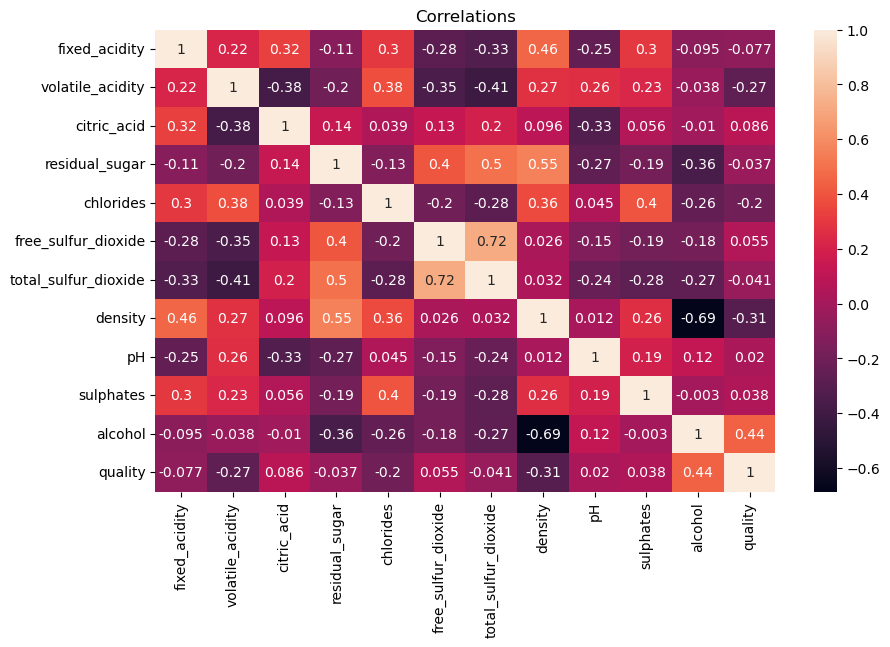

In [15]:
#Target (qaulity) has 
plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=True)
plt.title("Correlations")
plt.show()

In [16]:
abs(corrs["quality"]).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile_acidity        0.265699
chlorides               0.200666
citric_acid             0.085532
fixed_acidity           0.076743
free_sulfur_dioxide     0.055463
total_sulfur_dioxide    0.041385
sulphates               0.038485
residual_sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

In [17]:
# Define the features and the target
target = "quality"
features = ["alcohol", "volatile_acidity", "sulphates", "citric_acid", "total_sulfur_dioxide", 
            "density", "chlorides", "fixed_acidity", "pH", "free_sulfur_dioxide", "residual_sugar"]

X = df_combined3.loc[:, features]
y = df_combined3[target]

X.head()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density,chlorides,fixed_acidity,pH,free_sulfur_dioxide,residual_sugar
0,9.4,0.70,0.56,0.00,34.0,0.9978,0.076,7.4,3.51,11.0,1.9
1,9.8,0.88,0.68,0.00,67.0,0.9968,0.098,7.8,3.20,25.0,2.6
2,9.8,0.76,0.65,0.04,54.0,0.9970,0.092,7.8,3.26,15.0,2.3
3,9.8,0.28,0.58,0.56,60.0,0.9980,0.075,11.2,3.16,17.0,1.9
4,9.4,0.70,0.56,0.00,34.0,0.9978,0.076,7.4,3.51,11.0,1.9


In [18]:
# Initialize the model
lm = LinearRegression()

# Fit the Model
lm.fit(X, y)

# Predict the Model
preds = lm.predict(X)

# Evaluate the Model
mse = mean_squared_error(y, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, preds)
r2 = r2_score(y, preds)

report = f"""
R2: {r2}
MSE: {mse}
RMSE: {rmse}
MAE: {mae}
"""
print(report)

print(lm.coef_, lm.intercept_)

#R2 value is low (below 0.4) meaning there is a low correlation
#MSE value is slightly higher than we would like. The closer to 0, the better the model
#RMSE is kind of high, the model is better the lower it is
#MAE value should be lower for a better fit model but ours is kind of high


R2: 0.2921368850399051
MSE: 0.5397154672785655
RMSE: 0.7346532973304928
MAE: 0.5683159023114154

[ 2.67030009e-01 -1.32789221e+00  7.68251760e-01 -1.09656648e-01
 -2.48129841e-03 -5.49669422e+01 -4.83713531e-01  6.76839156e-02
  4.39296072e-01  5.96988830e-03  4.35587507e-02] 55.762749613349825


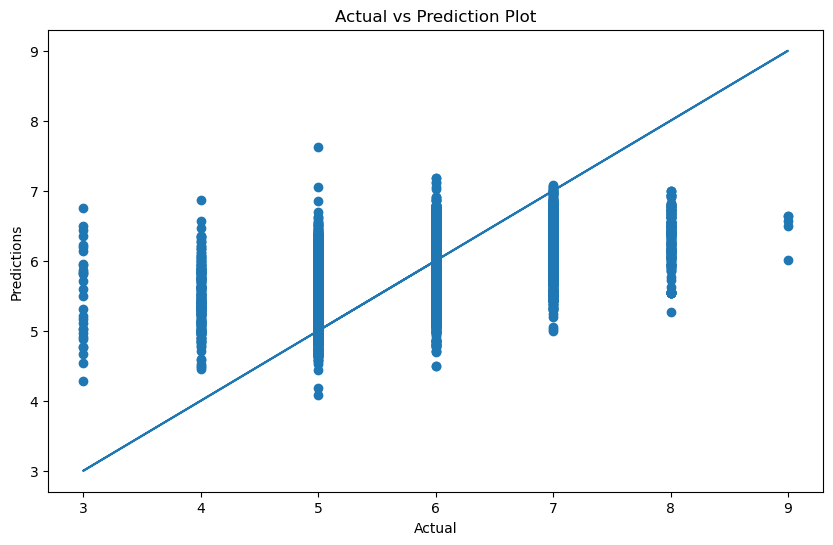

In [19]:
# Predicted vs Actual Plot
plt.figure(figsize=(10,6))
plt.scatter(y, preds)
plt.plot(y, y)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Prediction Plot")

plt.show()

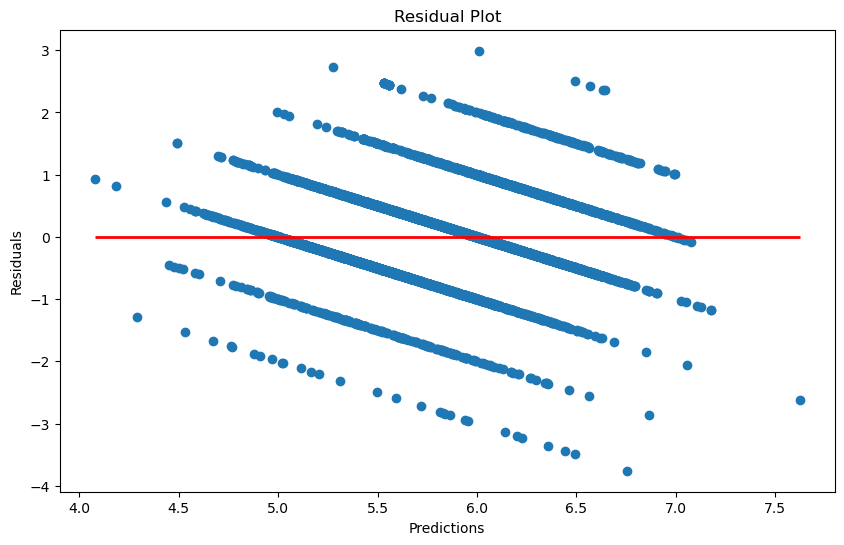

In [20]:
# Residual Plot
resids = y - preds

# Make the plot
plt.figure(figsize=(10,6))
plt.scatter(preds, resids)
plt.hlines(y=0, xmin=min(preds), xmax=max(preds), linewidth=2, color='r')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.show()

In [21]:
# RANDOM FOREST (supervised)
# Define features set
X = df_combined3.copy()
X.drop("quality", axis=1, inplace=True)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [22]:
# Define target vector
y = df_combined3["quality"].ravel()
y[:5]

array([5, 5, 5, 6, 5])

In [23]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [25]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [26]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Fitting the Random Forest Model
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [28]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [29]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [30]:
# Model evaluation
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2","Actual 3","Actual 4","Actual 5", "Actual 6"], 
    columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5", "Predicted 6"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [31]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6
Actual 0,0,0,7,2,0,0,0
Actual 1,0,6,30,14,0,0,0
Actual 2,0,0,393,146,4,0,0
Actual 3,0,1,115,546,45,0,0
Actual 4,0,0,5,113,135,3,0
Actual 5,0,0,0,15,20,24,0
Actual 6,0,0,0,0,1,0,0


Accuracy Score : 0.6793846153846154
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.86      0.12      0.21        50
           5       0.71      0.72      0.72       543
           6       0.65      0.77      0.71       707
           7       0.66      0.53      0.59       256
           8       0.89      0.41      0.56        59
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1625
   macro avg       0.54      0.36      0.40      1625
weighted avg       0.69      0.68      0.67      1625



In [32]:
# Feature Importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.12460578951843379, 'alcohol'),
 (0.1020438172629673, 'density'),
 (0.09918870542344221, 'volatile_acidity'),
 (0.0897416811311875, 'total_sulfur_dioxide'),
 (0.08681526334547943, 'sulphates'),
 (0.08666350180583153, 'residual_sugar'),
 (0.08651101661700283, 'chlorides'),
 (0.08608903621030604, 'free_sulfur_dioxide'),
 (0.08370213965418391, 'pH'),
 (0.07960195051325691, 'citric_acid'),
 (0.07503709851790852, 'fixed_acidity')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

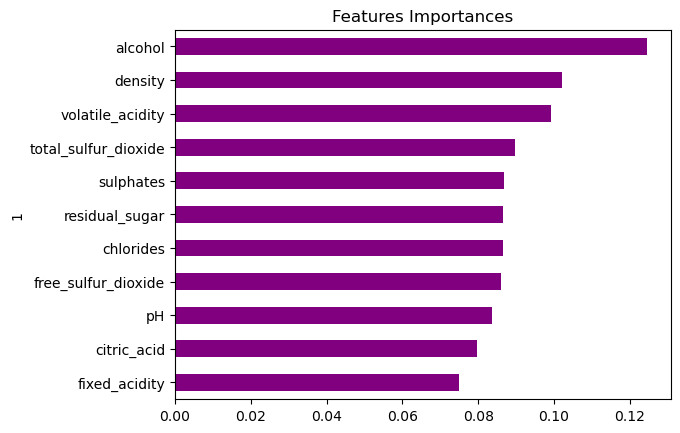

In [33]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='purple', title= 'Features Importances', legend=False)

In [34]:
#KNN Analysis

# Split target column from dataset
y = df_combined3['quality']
X = df_combined3.drop(columns='quality')

In [35]:
# Preview the data
X[:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [36]:
# Print first five entries for target
y[:5]

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [37]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [38]:
# Preview the data
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [39]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
X_train.shape

(4872, 11)

In [41]:
X_test.shape

(1625, 11)

In [42]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [44]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([5, 5, 5, ..., 7, 5, 6])

In [46]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[  1,   1,   2,   4,   0,   1,   0],
       [  0,   9,  25,  24,   2,   0,   0],
       [  3,  24, 316, 189,  40,   2,   0],
       [  1,  22, 177, 415,  95,  19,   0],
       [  0,   3,  16,  76, 122,  10,   1],
       [  0,   2,   1,   7,   8,   7,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [47]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.20      0.11      0.14         9
           4       0.15      0.15      0.15        60
           5       0.59      0.55      0.57       574
           6       0.58      0.57      0.57       729
           7       0.46      0.54      0.49       228
           8       0.18      0.28      0.22        25
           9       0.00      0.00      0.00         0

    accuracy                           0.54      1625
   macro avg       0.31      0.31      0.31      1625
weighted avg       0.54      0.54      0.54      1625



In [48]:
#PCA Analysis

In [49]:
# Scale the numeric features
# subset
df_sub = df_combined3.loc[:, features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density,chlorides,fixed_acidity,pH,free_sulfur_dioxide,residual_sugar
0,-0.915464,2.188833,0.193097,-2.192833,-1.446359,1.034993,0.569958,0.142473,1.813090,-1.100140,-0.744778
1,-0.580068,3.282235,0.999579,-2.192833,-0.862469,0.701486,1.197975,0.451036,-0.115073,-0.311320,-0.597640
2,-0.580068,2.553300,0.797958,-1.917553,-1.092486,0.768188,1.026697,0.451036,0.258120,-0.874763,-0.660699
3,-0.580068,-0.362438,0.327510,1.661085,-0.986324,1.101694,0.541412,3.073817,-0.363868,-0.762074,-0.744778
4,-0.915464,2.188833,0.193097,-2.192833,-1.446359,1.034993,0.569958,0.142473,1.813090,-1.100140,-0.744778


In [50]:
df_scaled.describe()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density,chlorides,fixed_acidity,pH,free_sulfur_dioxide,residual_sugar
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,2.624754e-17,1.049902e-16,-5.424491e-16,2.187295e-17,-6.999344e-17,-3.552167e-15,1.749836e-17,-3.849639e-16,2.729744e-15,-8.749179e-17,3.499672e-17
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.089350e+00,-1.577330e+00,-2.091935e+00,-2.192833e+00,-1.941780e+00,-2.530192e+00,-1.342639e+00,-2.634589e+00,-3.100615e+00,-1.663583e+00,-1.018034e+00
25%,-8.316152e-01,-6.661613e-01,-6.805919e-01,-4.723335e-01,-6.855323e-01,-7.859527e-01,-5.147986e-01,-6.289329e-01,-6.748622e-01,-7.620742e-01,-7.657978e-01
50%,-1.608231e-01,-3.016939e-01,-1.429373e-01,-5.941375e-02,3.990667e-02,6.448888e-02,-2.578826e-01,-1.660892e-01,-5.287424e-02,-8.594301e-02,-5.135612e-01
75%,6.776670e-01,3.664962e-01,4.619241e-01,4.911459e-01,7.122647e-01,7.648525e-01,2.559494e-01,3.738951e-01,6.313125e-01,5.901882e-01,5.584445e-01
max,3.696231e+00,7.534354e+00,9.870879e+00,9.231281e+00,5.737257e+00,1.476879e+01,1.584219e+01,6.699425e+00,4.923029e+00,1.456357e+01,1.268682e+01


In [51]:
#Instantiate the PCA instance and declare the number of PCA variables
num_pca = len(df_scaled.columns)
pca = PCA(n_components=num_pca)

# Fit the PCA model on the transformed credit card DataFrame
data_pca = pca.fit_transform(df_scaled)

# Create the PCA DataFrame
df_pca = pd.DataFrame(
    data_pca,
    columns=[f"PCA{x+1}" for x in range(num_pca)]
)

df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460
1,-3.039051,1.107462,-2.046952,-0.770225,-1.322655,1.655121,0.059559,-0.514603,-0.429129,-0.268149,-0.015471
2,-3.071893,0.878964,-1.742580,-0.802257,-0.762112,0.848374,0.167670,-0.420952,-0.271032,-0.086832,0.054146
3,-1.571262,2.112545,2.592917,-0.292785,0.604701,-0.713308,-0.851217,-0.929669,0.549410,0.116660,-0.103745
4,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460


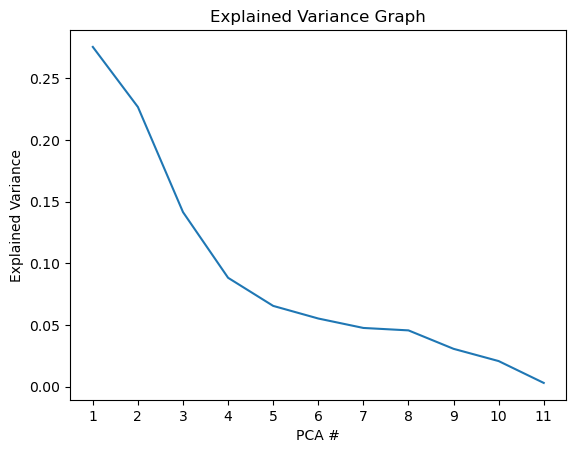

In [52]:
# Can dimensions be reduced?
# Calculate the PCA explained variance ratio
exp_var = pca.explained_variance_ratio_

plt.plot(range(1, num_pca + 1), exp_var)
plt.title("Explained Variance Graph")
plt.xlabel("PCA #")
plt.ylabel("Explained Variance")
plt.xticks(range(1, num_pca + 1))
plt.show()

In [53]:
print("Explained Variance")
for i in range(len(exp_var)):
    val = exp_var[i]
    print(f"PCA{i+1}:", round(val, 3))

print()
print("CUMULATIVE Explained Variance")

exp_var_cum = np.cumsum(exp_var)
for i in range(len(exp_var_cum)):
    val = exp_var_cum[i]
    print(f"PCA{i+1}:", round(val, 3))

Explained Variance
PCA1: 0.275
PCA2: 0.227
PCA3: 0.141
PCA4: 0.088
PCA5: 0.065
PCA6: 0.055
PCA7: 0.048
PCA8: 0.046
PCA9: 0.031
PCA10: 0.021
PCA11: 0.003

CUMULATIVE Explained Variance
PCA1: 0.275
PCA2: 0.502
PCA3: 0.644
PCA4: 0.732
PCA5: 0.797
PCA6: 0.853
PCA7: 0.9
PCA8: 0.946
PCA9: 0.976
PCA10: 0.997
PCA11: 1.0


In [54]:
#Keep 6 colmuns
df_combined4 = df_pca.loc[:, ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6"]]
df_combined4.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363
1,-3.039051,1.107462,-2.046952,-0.770225,-1.322655,1.655121
2,-3.071893,0.878964,-1.742580,-0.802257,-0.762112,0.848374
3,-1.571262,2.112545,2.592917,-0.292785,0.604701,-0.713308
4,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363


In [55]:
df_combined4.corr()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
PCA1,1.000000e+00,-2.377971e-16,-1.185145e-16,1.672197e-16,1.738444e-16,3.367023e-16
PCA2,-2.377971e-16,1.000000e+00,-3.272117e-16,-1.134632e-16,1.386071e-16,1.253019e-16
PCA3,-1.185145e-16,-3.272117e-16,1.000000e+00,-6.553227e-16,-8.708063e-17,-4.558352e-16
PCA4,1.672197e-16,-1.134632e-16,-6.553227e-16,1.000000e+00,-2.071100e-16,3.173961e-17
PCA5,1.738444e-16,1.386071e-16,-8.708063e-17,-2.071100e-16,1.000000e+00,-5.798468e-17
PCA6,3.367023e-16,1.253019e-16,-4.558352e-16,3.173961e-17,-5.798468e-17,1.000000e+00


In [56]:
print(df_combined4.columns)

Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'], dtype='object')


In [57]:
# redo the regression
y = df_combined3[target]
X = df_combined3

# Initialize the model
lm = LinearRegression()

# Fit the Model
lm.fit(X, y)

# Predict the Model
preds = lm.predict(X)

# Evaluate the Model
mse = mean_squared_error(y, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, preds)
r2 = r2_score(y, preds)

report = f"""
R2: {r2}
MSE: {mse}
RMSE: {rmse}
MAE: {mae}
"""
print(report)

print(lm.coef_, lm.intercept_)


R2: 1.0
MSE: 1.3004002300934333e-30
RMSE: 1.1403509240989957e-15
MAE: 8.380073438143402e-16

[ 0.00000000e+00 -1.99666672e-15 -4.82289041e-15  1.35525272e-18
  3.08725764e-15  2.22261445e-17 -1.43114687e-17 -1.04045640e-14
 -2.23526913e-16 -1.71392035e-16  2.66767945e-16  1.00000000e+00] 1.509903313490213e-14


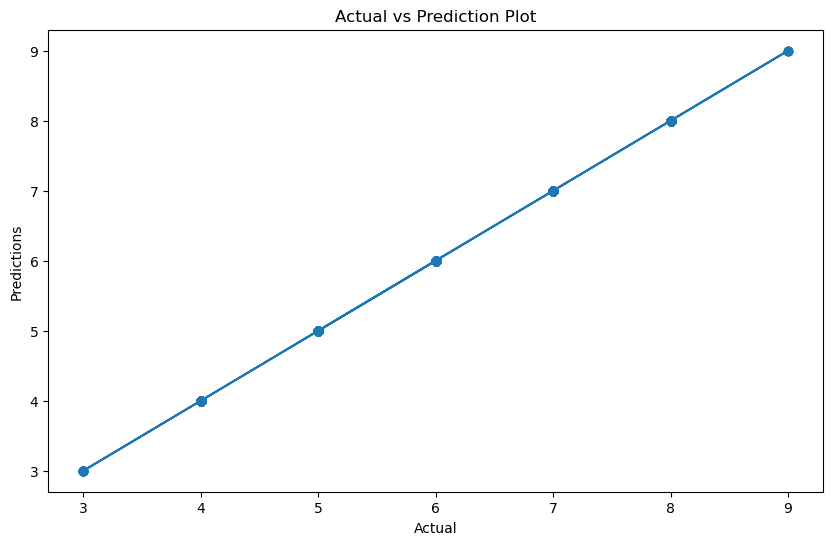

In [58]:
# Predicted vs Actual Plot
plt.figure(figsize=(10,6))
plt.scatter(y, preds)
plt.plot(y, y)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Prediction Plot")

plt.show()

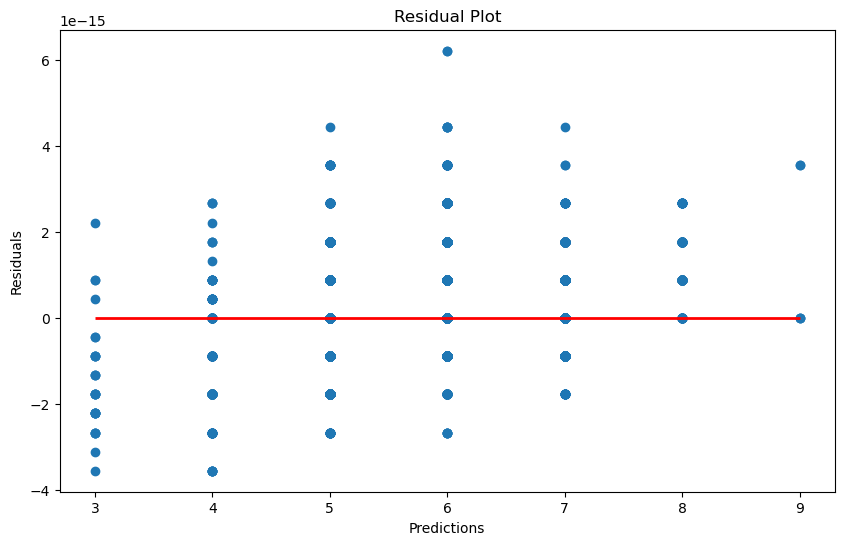

In [59]:
# Residual Plot
resids = y - preds

# Make the plot
plt.figure(figsize=(10,6))
plt.scatter(preds, resids)
plt.hlines(y=0, xmin=min(preds), xmax=max(preds), linewidth=2, color='r')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.show()

In [60]:
#Decision Tree Analysis
df_combined3.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
# Define features set
X = df_combined3.copy()
X.drop("quality", axis=1, inplace=True)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [62]:
# Define target vector
y = df_combined3["quality"].values.reshape(-1, 1)
y[:5]


array([[5],
       [5],
       [5],
       [6],
       [5]])

In [63]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [64]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [65]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [66]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [67]:
from sklearn import tree

In [68]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [69]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [70]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [71]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5", "Actual 6"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5", "Predicted 6"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [72]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6
Actual 0,0,0,6,3,0,0,0
Actual 1,1,13,20,10,5,1,0
Actual 2,0,20,350,149,19,5,0
Actual 3,1,9,135,463,83,16,0
Actual 4,0,6,26,76,140,8,0
Actual 5,0,1,1,17,15,25,0
Actual 6,0,0,0,0,1,0,0


Accuracy Score : 0.6098461538461538
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.27      0.26      0.26        50
           5       0.65      0.64      0.65       543
           6       0.64      0.65      0.65       707
           7       0.53      0.55      0.54       256
           8       0.45      0.42      0.44        59
           9       0.00      0.00      0.00         1

    accuracy                           0.61      1625
   macro avg       0.36      0.36      0.36      1625
weighted avg       0.61      0.61      0.61      1625

